Uses Allen API (https://community.brain-map.org/t/atlas-drawing-and-ontologies/2864)
to fetch Allen Developing human brain atlas

In [1]:
import requests

import sys
sys.path.append('..')

from allen_functions import (
    fetch_atlas_metadata, fetch_graphic_groups, fetch_atlas_images, 
    get_image_url, get_svg_url
)

from PIL import Image
import numpy as np
from io import BytesIO
import json

from matplotlib import pyplot as plt

atlas ids:
* 3 = 21 pcw cerebrum
* 287730656 = 21 pcw brainstem
* 138322603 = 15 pcw

In [2]:
atlas_id=3

metadata = fetch_atlas_metadata( atlas_id )
images = fetch_atlas_images( metadata )
graphic_groups = fetch_graphic_groups( metadata )

In [3]:
'number of images: %d' % len(images)

'number of images: 169'

In [4]:
# mpp = 2^downsample
downsample = 3  # implies mpp=8

In [5]:
for img in images:
    if img['section_number']==357:
        break

https://atlas.brain-map.org/atlas?atlas=3#atlas=3&plate=101892528&structure=10529&x=7370.675223214286&y=17332.862723214286&zoom=-5&resolution=45.05&z=3

In [6]:
# img = images[20]
image_url = get_image_url(atlas_id, img, downsample, False)
annot_url = get_svg_url(atlas_id, img, graphic_groups[-1:], downsample)

In [7]:
annot_url

'http://api.brain-map.org/api/v2/svg/101892528?downsample=3&groups=31'

In [8]:
req = requests.get(image_url, timeout=500, stream=True)
im = Image.open(BytesIO(req.content))

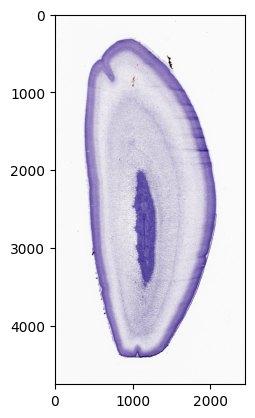

In [9]:
plt.imshow(im)

In [10]:
req = requests.get(annot_url, timeout=500)

In [11]:
from allen_functions import get_svg_paths, make_polyshape, make_geojson_feature

In [12]:
svg_data = req.text

In [13]:
paths = get_svg_paths(svg_data)

In [14]:
paths.keys()

dict_keys(['10155', '10595', '10596', '10557', '10561', '11580', '12967', '11587', '11586', '11585', '11583', '10542', '10536', '10529', '10522', '10515', '11716', '11664', '11661', '11658', '11652', '10508', '11630', '11612', '11611', '11610', '11608'])

In [15]:
for ontoid,coords in paths.items():
    print(ontoid,len(coords))

10155 1
10595 1
10596 1
10557 1
10561 1
11580 2
12967 1
11587 1
11586 1
11585 1
11583 1
10542 1
10536 1
10529 2
10522 1
10515 2
11716 1
11664 1
11661 1
11658 1
11652 1
10508 2
11630 1
11612 1
11611 1
11610 1
11608 1


In [21]:
strid = '10529' #'10155'
gj = make_geojson_feature(strid,paths[strid])
shp = make_polyshape(paths[strid])

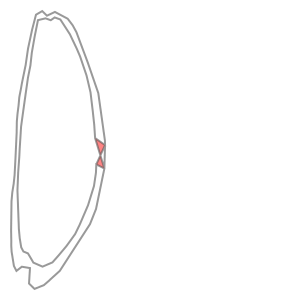

In [22]:
shp

In [23]:
len(gj['geometry']['coordinates'])

2

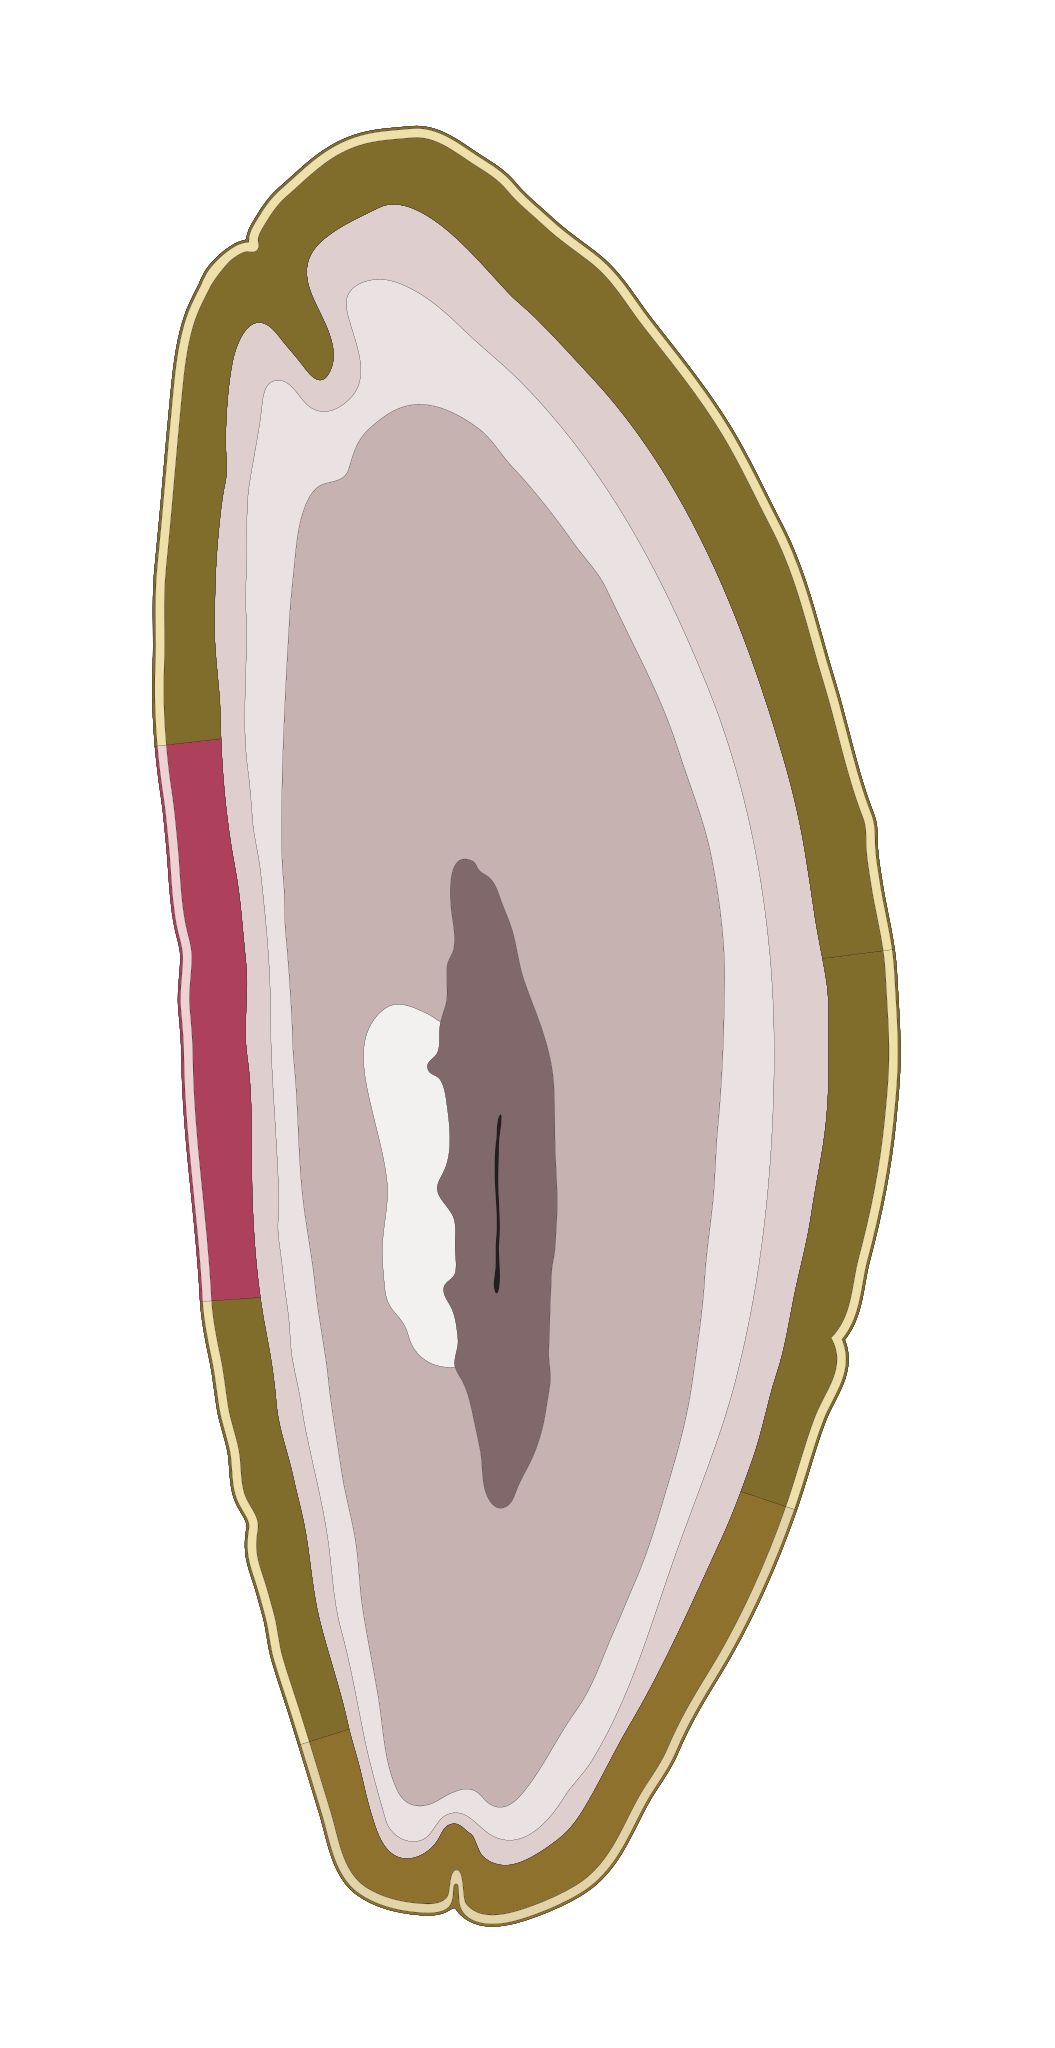

In [17]:
from IPython.display import SVG
display(SVG(req.content))

Allen ontology

In [2]:
from ontology_handling import TreeHelper

In [3]:
allen_onto_helper = TreeHelper('allen_devhuman')

In [4]:
allen_onto_helper.print_tree()

[lvl] id (acronym) name
---------------------
 [0] 10155 (Br) brain
   [1] 10156 (F) forebrain (prosencephalon)
     [2] 10157 (FGM) gray matter of forebrain
       [3] 10506 (FTS) transient structures of forebrain
         [4] 11580 (SG) subpial granular zone
           [5] 11581 (fSG) SG in frontal neocortex
             [6] 11587 (fSGfp) SG in frontal polar cortex
             [6] 11582 (fSGdm) SG in dorsomedial frontal cortex
             [6] 11585 (fSGdl) SG in dorsolateral prefrontal cortex
             [6] 11586 (fSGvl) SG in ventrolateral prefrontal cortex
             [6] 11583 (fSGor) SG in orbital frontal cortex
             [6] 11584 (fSGm1) SG in posterior frontal cortex (motor cortex)
           [5] 11593 (pSG) SG in parietal neocortex
             [6] 11594 (pSGs1) SG in primary somatosensory cortex
             [6] 11597 (pSGdm) SG in dorsomedial parietal cortex (area 7m)
             [6] 11595 (pSGpd) SG in posterosuperior (dorsal) parietal cortex
             [6] 1159